# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
# def func(size):
#     a = np.random.random((size,size))
#     b = np.random.random((size,size))
#     c = a + b
#     return c
#
# for size in [100, 1000, 10000]:
#     print('SIZE: ', size)
#     print('Timing: ')
#     saved_timing = %timeit -r 5 -n 10 -o func(size)
#     saved_timing.average   # średni czas próby
#     saved_timing.stdev     # odchylenie standardowe
#     print('Memory usage: ')
#     %memit func(size)
#     print('\n')

***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


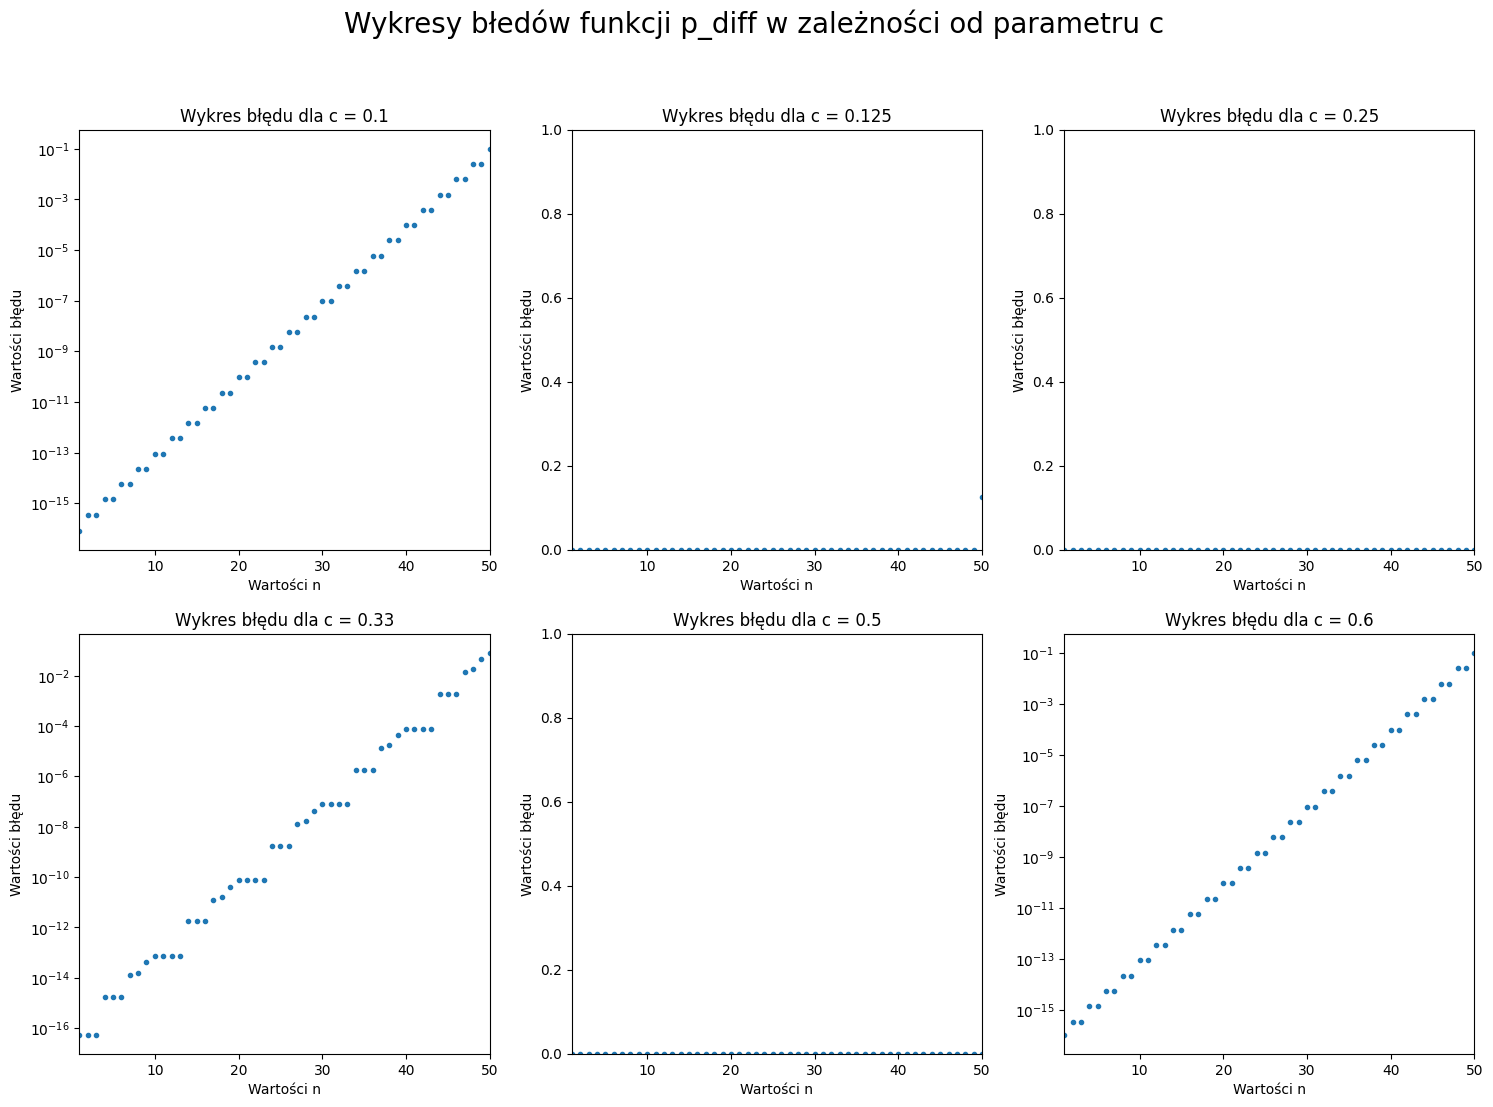

In [3]:
n = [x for x in range(1, 51)]
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
x = np.zeros((6, 50))
for i in range(50):
    for j in range(6):
        x[j][i] = main.p_diff(n[i], c[j])
plt.figure(figsize=(18, 12))
for j in range(6):
    plt.subplot(int("23" + str(j + 1)))
    plt.plot(n, x[j, :], '.')
    if np.all(x[j, :]) == 0:
        plt.yscale("linear")
        plt.ylim([0, 1])
    else:
        plt.yscale("log")

    plt.title(f"Wykres błędu dla c = {c[j]}")
    plt.xlabel("Wartości n")
    plt.ylabel("Wartości błędu")
    plt.xlim([1, 50])

c = plt.suptitle("Wykresy błedów funkcji p_diff w zależności od parametru c", fontsize=20)

***Wnioski***
1. We wszystkich przypadkach powinniśmy otrzymać 0.
2. Liczby których rozwinięcie dziesiętne można zapisać w sposób sumy szeregu kolejnych ujemnych potęg liczby 2 mają skończoną reprezentajcę w naszym przypadku są to liczby c = [0.125 , 0.25 , 0,5].
3. Róznica wyników jest spowodowana zaokrągleniami szeregu ujemnych potęg liczby 2.
4. Błąd zaokrąglenia.
5. Należałoby w pierwszej kolejności odejmować od siebie liczby o podobnym rzędzie wielkości.

***Zadanie 2.***
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

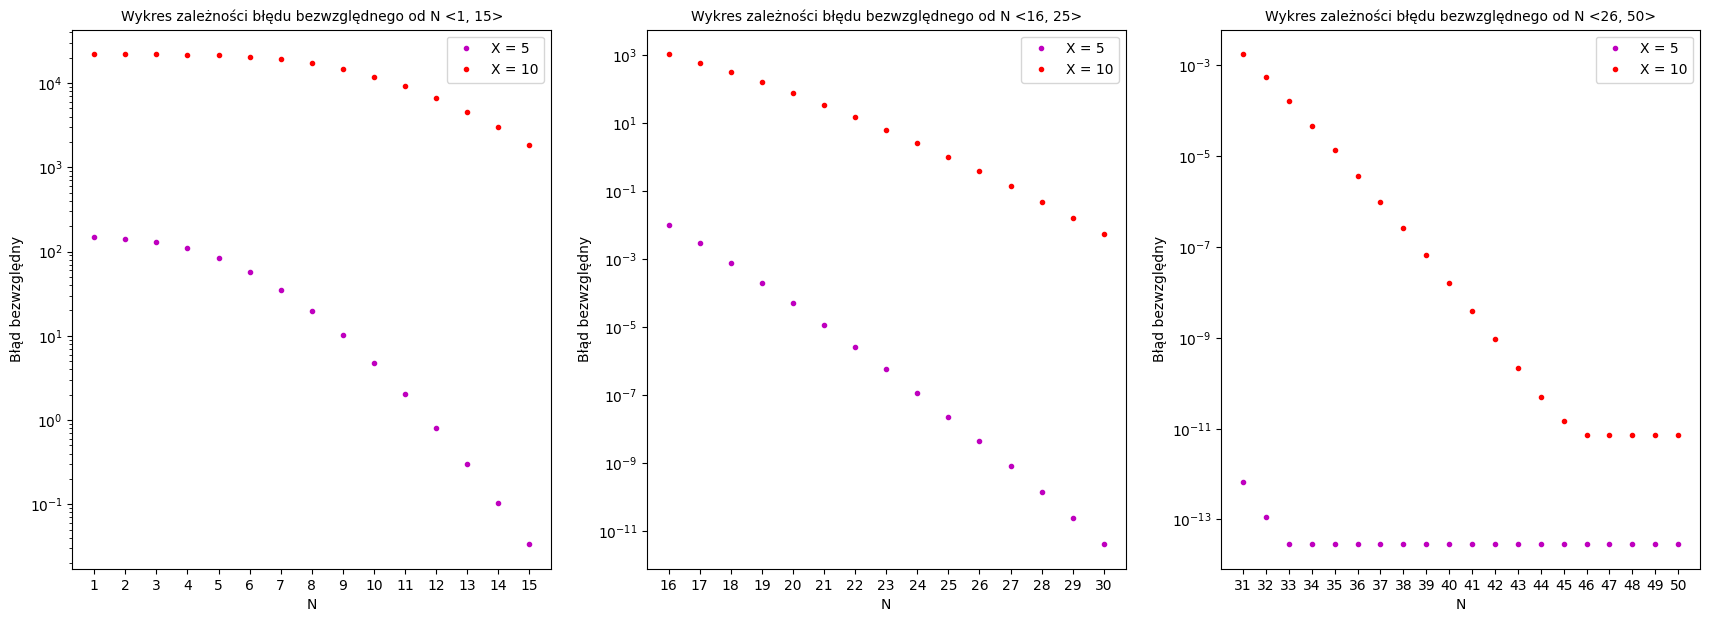

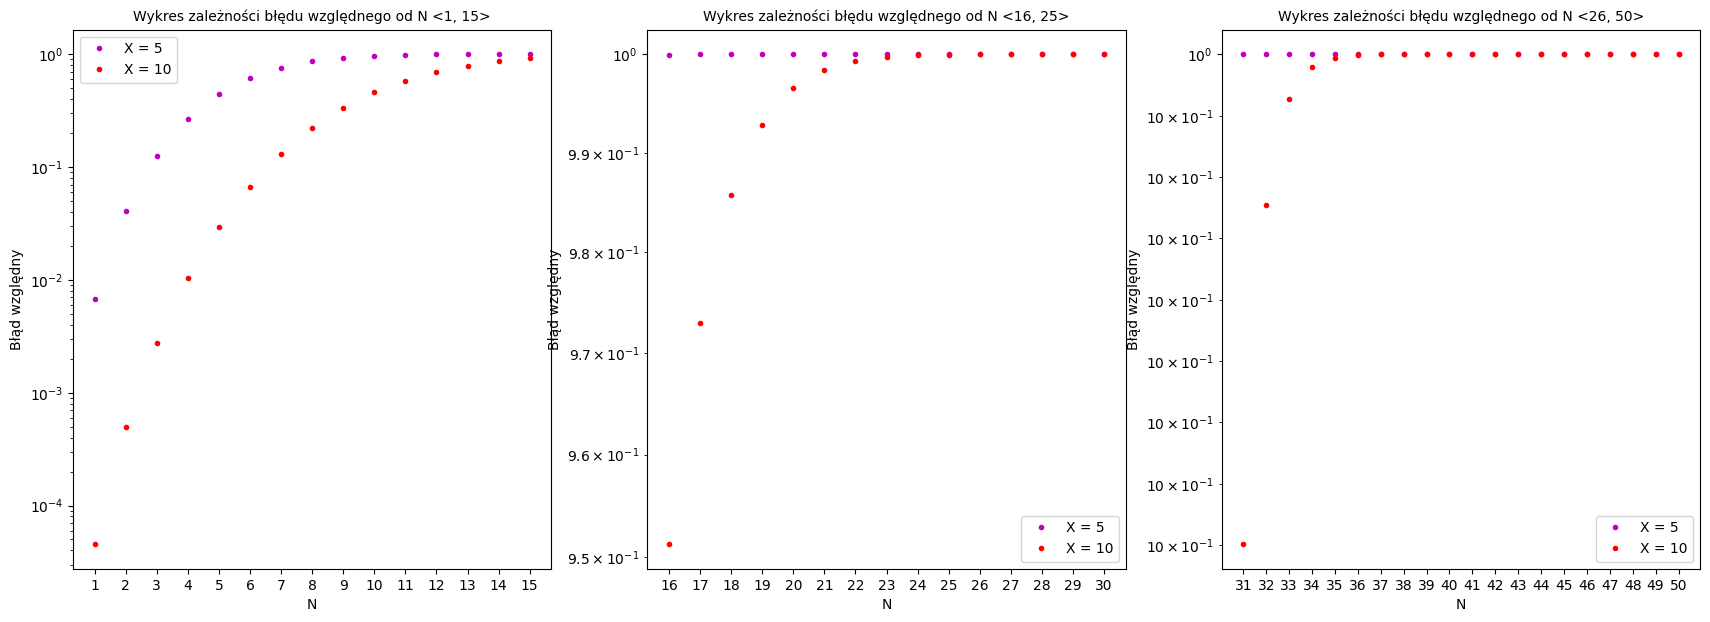

In [4]:
n = 50
x1 = 5
exp1 = np.zeros((n, 3))
npexp1 = np.exp(x1)

x2 = 10
exp2 = np.zeros((n, 3))
npexp2 = np.exp(x2)

for i in range(1, n + 1):
    exp1[i - 1][0] = i
    exp1[i - 1][1] = main.exponential(x1, i)
    exp2[i - 1][0] = i
    exp2[i - 1][1] = main.exponential(x2, i)

exp1[:, 1] = main.absolut_error(npexp1, exp1[:, 1])
exp1[:, 2] = main.relative_error(npexp1, exp1[:, 1])
exp2[:, 1] = main.absolut_error(npexp2, exp2[:, 1])
exp2[:, 2] = main.relative_error(npexp2, exp2[:, 1])

fig1, (ab_er15, ab_er30, ab_er31) = plt.subplots(1, 3, figsize=(21, 7))

ab_er15.plot(exp1[:15, 0], exp1[:15, 1], 'm.', label=f'X = {x1}')
ab_er15.plot(exp2[:15, 0], exp2[:15, 1], 'r.', label=f'X = {x2}')
ab_er15.legend()
ab_er15.set_xticks(np.arange(1, 16, 1))
ab_er15.set_yscale('log')
ab_er15.set(xlabel='N', ylabel='Błąd bezwzględny')
ab_er15.set_title('Wykres zależności błędu bezwzględnego od N <1, 15>', size=10)

ab_er30.plot(exp1[15:30, 0], exp1[15:30, 1], 'm.', label=f'X = {x1}')
ab_er30.plot(exp2[15:30, 0], exp2[15:30, 1], 'r.', label=f'X = {x2}')
ab_er30.legend()
ab_er30.set_xticks(np.arange(16, 31, 1))
ab_er30.set_yscale('log')
ab_er30.set(xlabel='N', ylabel='Błąd bezwzględny')
ab_er30.set_title('Wykres zależności błędu bezwzględnego od N <16, 25>', size=10)

ab_er31.plot(exp1[30:, 0], exp1[30:, 1], 'm.', label=f'X = {x1}')
ab_er31.plot(exp2[30:, 0], exp2[30:, 1], 'r.', label=f'X = {x2}')
ab_er31.legend()
ab_er31.set_xticks(np.arange(31, n + 1, 1))
ab_er31.set_yscale('log')
ab_er31.set(xlabel='N', ylabel='Błąd bezwzględny')
ab_er31.set_title('Wykres zależności błędu bezwzględnego od N <26, 50>', size=10)

fig2, (re_er15, re_er30, re_er31) = plt.subplots(1, 3, figsize=(21, 7))

re_er15.plot(exp1[:15, 0], exp1[:15, 2], 'm.', label=f'X = {x1}')
re_er15.plot(exp2[:15, 0], exp2[:15, 2], 'r.', label=f'X = {x2}')
re_er15.legend()
re_er15.set_xticks(np.arange(1, 16, 1))
re_er15.set_yscale('log')
re_er15.set(xlabel='N', ylabel='Błąd względny')
re_er15.set_title('Wykres zależności błędu względnego od N <1, 15>', size=10)

re_er30.plot(exp1[15:30, 0], exp1[15:30, 2], 'm.', label=f'X = {x1}')
re_er30.plot(exp2[15:30, 0], exp2[15:30, 2], 'r.', label=f'X = {x2}')
re_er30.legend()
re_er30.set_xticks(np.arange(16, 31, 1))
re_er30.set_yscale('log')
re_er30.set(xlabel='N', ylabel='Błąd względny')
re_er30.set_title('Wykres zależności błędu względnego od N <16, 25>', size=10)

re_er31.plot(exp1[30:, 0], exp1[30:, 2], 'm.', label=f'X = {x1}')
re_er31.plot(exp2[30:, 0], exp2[30:, 2], 'r.', label=f'X = {x2}')
re_er31.legend()
re_er31.set_xticks(np.arange(31, n + 1, 1))
re_er31.set_yscale('log')
re_er31.set(xlabel='N', ylabel='Błąd względny')
b = re_er31.set_title('Wykres zależności błędu względnego od N <26, 50>', size=10)

***Wnioski***
1. Ten przykład opisuje błąd metody, wynika on z obliczenia skończonego rozwinięcia liczby posiadającej nieskończone rozwinięcie.
2. Wraz z rosnącym N błąd spada, aż staje się równy zero, im większy X tym dłużej zauważalny jest niezerowy błąd.

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

Metoda 1:
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$

Metoda 2:
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

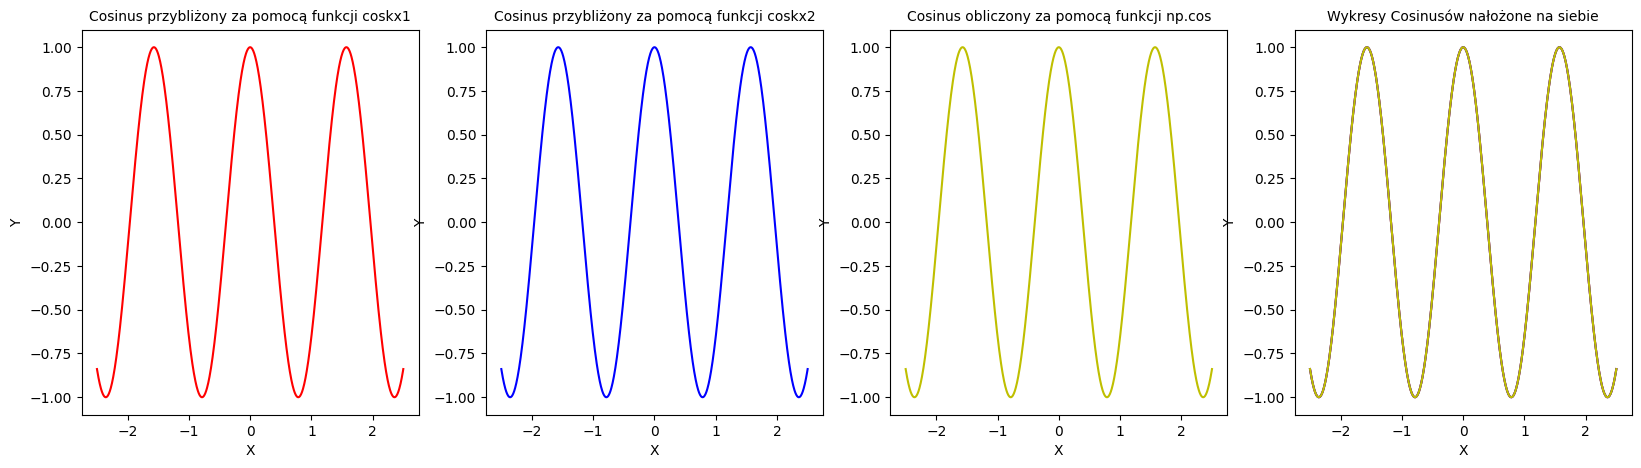

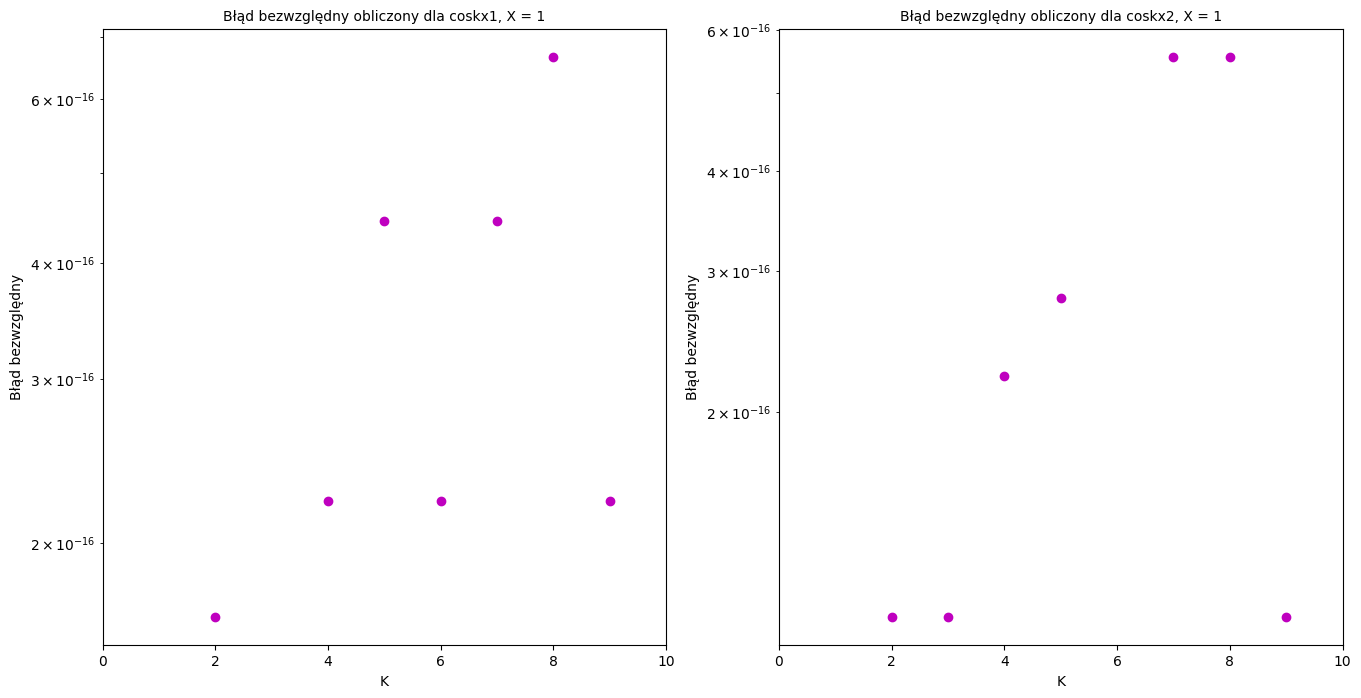

In [5]:
k = 4
x = np.linspace(-10 / k, 10 / k, 1000)
y1 = np.linspace(-10 / k, 10 / k, 1000)
y2 = np.linspace(-10 / k, 10 / k, 1000)
for i in range(len(x)):
    y1[i] = main.coskx1(k, x[i])
for i in range(len(x)):
    y2[i] = main.coskx2(k, x[i])[0]
fig1, (coskx1, coskx2, npcos, allcos) = plt.subplots(1, 4, figsize=(20, 5))

coskx1.plot(x, y1, 'r-')
coskx1.set_title('Cosinus przybliżony za pomocą funkcji coskx1', fontsize=10)
coskx1.set(xlabel='X', ylabel='Y')

coskx2.plot(x, y2, 'b-')
coskx2.set_title('Cosinus przybliżony za pomocą funkcji coskx2', fontsize=10)
coskx2.set(xlabel='X', ylabel='Y')

npcos.plot(x, np.cos(k * x), 'y-')
npcos.set_title('Cosinus obliczony za pomocą funkcji np.cos', fontsize=10)
npcos.set(xlabel='X', ylabel='Y')

allcos.plot(x, y1, 'r-')
allcos.plot(x, y2, 'b-')
allcos.plot(x, np.cos(k * x), 'y-')
allcos.set_title('Wykresy Cosinusów nałożone na siebie', fontsize=10)
allcos.set(xlabel='X', ylabel='Y')

fig2, (ae_coskx1, ae_coskx2) = plt.subplots(1, 2, figsize=(16, 8))
x = 1
n = 10
k = [i for i in range(n)]
err = np.zeros(n)

for i in range(len(k)):
    err[i] = main.absolut_error(main.coskx1(i, x), np.cos(i * x))
ae_coskx1.plot(k, err, 'mo')
ae_coskx1.set_yscale('log')
ae_coskx1.set_xlim([0, n])
ae_coskx1.set(xlabel='K', ylabel='Błąd bezwzględny')
ae_coskx1.set_title(f'Błąd bezwzględny obliczony dla coskx1, X = {x}', fontsize=10)

for i in range(len(k)):
    err[i] = main.absolut_error(main.coskx2(i, x)[0], np.cos(i * x))
ae_coskx2.plot(k, err, 'mo')
ae_coskx2.set_yscale('log')
ae_coskx2.set_xlim([0, n])
ae_coskx2.set(xlabel='K', ylabel='Błąd bezwzględny')
c = ae_coskx2.set_title(f'Błąd bezwzględny obliczony dla coskx2, X = {x}', fontsize=10)

***Wnioski***
* Rekurencyjne funkcje wyliczania coskx1 i coskx2 dla dużych liczb k stają się bardzo wolne, co uniemożliwia porównanie ich działania dla większego niż przedstawiony na wykresach zakresu liczby k.
* Przybliżenia cos(k*x) są dość dokładne, co można zauważyć na wykresach funkcji oraz po wielkości błędów jakie popełniają.

***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

N:  1
Czas wykonania: 
3.22 µs ± 920 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 156.98 MiB, increment: 0.04 MiB
---------------------------------------------
N:  2
Czas wykonania: 
5.29 µs ± 1.19 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 156.98 MiB, increment: 0.00 MiB
---------------------------------------------
N:  3
Czas wykonania: 
7.24 µs ± 1.33 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 156.98 MiB, increment: 0.00 MiB
---------------------------------------------
N:  4
Czas wykonania: 
9.3 µs ± 1.22 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 156.98 MiB, increment: 0.00 MiB
---------------------------------------------
N:  5
Czas wykonania: 
11.3 µs ± 1.13 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Zużycie pamięci: 
peak memory: 156.98 MiB, increment: 0.00 MiB
---------------------------------

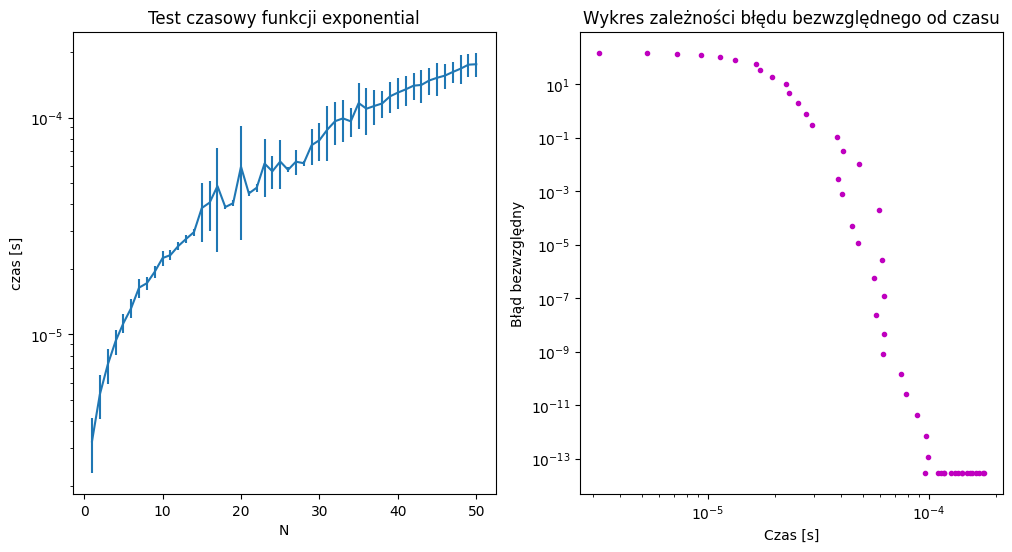

In [6]:
times = 50
x = 5
npexp = np.exp(x)
n = [x for x in range(1, times + 1)]
time_avg = np.zeros(times)
time_std_dev = np.zeros(times)
peak_mem = np.zeros(times)
abs_err = np.zeros(times)

for i in range(len(n)):
    print('N: ', n[i])
    print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o main.exponential(x, n[i])
    time_avg[i] = saved_timing.average
    time_std_dev[i] = saved_timing.stdev
    print('Zużycie pamięci: ')
    saved_mem = %memit -o  main.exponential(x, n[i])
    peak_mem[i] = float(saved_mem.mem_usage.copy()[0])
    print('---------------------------------------------')
    abs_err[i] = main.absolut_error(npexp, main.exponential(x, i))

fig1, (time, error) = plt.subplots(1, 2, figsize=(12, 6))
time.set_title("Test czasowy funkcji exponential")
time.set_yscale("log")
time.set_ylabel("czas [s]")
time.set_xlabel("N")
time.errorbar(n, time_avg, yerr=time_std_dev)

error.plot(time_avg, abs_err, 'm.')
error.set_xlabel("Czas [s]")
error.set_ylabel("Błąd bezwzględny")
error.set_title('Wykres zależności błędu bezwzględnego od czasu')
error.set_yscale("log")
error.set_xscale("log")

***Wnioski***
* Funkcja timeit umożliwia określenie czasu wykonania funkcji wraz z jej odchyleniem standardowym, które następnie zostały zwizualizowane na wykresie typu errorbar. Można zauważyć, że wraz ze wzrostem liczby N czas wykonania funkcji wydłuża się, ale zarazem otrzymana wartość liczby jest dokładniejsza.
* Funkcja memit pozwala na sprawdzenie jaka ilość pamięci jest zużywana do wykonania danej funkcji, niestety ilość jej jest taka sama dla każdej liczby N, co wydaje się być nie do końca zgodne z rzeczywistością.
